# Лабораторная работа 9

Понижение размерности признакового пространства



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import manifold, datasets
from sklearn import decomposition

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

0 Найти датасет (желательно датасет для многоклассовой классификации, либо дадасет из предыдущей работы с результатами кластеризации) с большим количеством вещественных признаков (от 20-ти шт.). Добавьте описание датасета (в случае большого количества однотипных признаков, достаточно краткое описание на ваше усмотрение).

In [2]:
df = pd.read_csv('microbes.csv', index_col=0)

In [3]:
df

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,10.70,15.8,5.43,3.75,0.7850,8.14,2.15,22.3,2.97,10.90,...,2.97,1.340,1.610,0.683,0.1950,3.63,12.10,1.310,7.99,Spirogyra
1,5.60,18.3,4.14,6.16,0.3640,3.51,18.60,22.5,5.41,19.20,...,5.47,1.520,1.520,1.010,0.2150,6.01,20.60,0.765,7.99,Spirogyra
2,8.32,19.8,4.63,6.66,0.4150,5.85,21.00,22.4,5.96,10.20,...,5.96,1.630,1.380,1.110,0.1820,6.55,11.50,0.953,7.99,Spirogyra
3,10.10,17.9,7.29,11.10,1.4700,6.30,9.94,21.9,8.81,10.70,...,8.88,2.040,2.120,0.715,0.3710,10.30,12.00,2.340,7.99,Spirogyra
4,6.27,20.2,20.10,10.70,14.7000,3.97,2.58,11.9,10.20,1.22,...,10.20,7.780,6.210,6.800,4.4400,14.00,9.55,17.600,7.99,Spirogyra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30522,3.01,22.6,4.90,20.00,0.4340,1.40,19.90,22.1,18.10,9.92,...,18.60,4.350,1.350,1.710,0.5490,19.10,13.20,1.070,7.15,Ulothrix
30523,5.19,22.6,2.07,19.40,0.0788,1.67,5.09,22.8,19.20,16.20,...,20.00,1.460,0.411,0.458,0.0597,19.80,17.20,0.197,7.15,Ulothrix
30524,9.21,22.7,2.07,21.00,0.0790,5.81,12.70,22.8,20.10,11.40,...,20.10,1.060,0.257,0.319,0.0341,20.70,11.60,0.198,7.15,Ulothrix
30525,8.21,22.6,1.87,20.50,0.0641,5.96,11.30,22.8,20.20,20.20,...,20.20,1.010,0.285,0.350,0.0314,20.80,20.40,0.162,7.15,Ulothrix


In [4]:
df = df.sample(frac=0.1)
df.reset_index(drop=True, inplace=True)

In [5]:
df.dtypes

Solidity           float64
Eccentricity       float64
EquivDiameter      float64
Extrema            float64
FilledArea         float64
Extent             float64
Orientation        float64
EulerNumber        float64
BoundingBox1       float64
BoundingBox2       float64
BoundingBox3       float64
BoundingBox4       float64
ConvexHull1        float64
ConvexHull2        float64
ConvexHull3        float64
ConvexHull4        float64
MajorAxisLength    float64
MinorAxisLength    float64
Perimeter          float64
ConvexArea         float64
Centroid1          float64
Centroid2          float64
Area               float64
raddi              float64
microorganisms      object
dtype: object

In [6]:
df.isin([np.nan, np.inf, -np.inf]).any().any()

False

1 Визуализируйте точки из исходного признакового пространства в 2-мерном пространстве двух признаков, используя алгоритм t-SNE (sklearn.manifold.TSNE). Цвет точек пусть отражает метки классов (или номера кластеров из предыдущей работы).

In [7]:
y, y_labels = pd.factorize(df.pop('microorganisms'))

In [8]:
df

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
0,7.57,22.6,2.730,5.72,0.1440,5.96,22.500,22.6,5.63,7.25,...,5.63,5.64,1.210,0.3800,0.4210,0.07060,5.77,8.31,0.3370,5.330
1,20.10,16.7,1.130,9.16,0.0242,14.80,15.400,23.0,9.00,2.17,...,9.03,9.00,0.197,0.2200,0.0579,0.00494,8.93,2.16,0.0620,0.152
2,5.54,17.8,6.950,19.30,1.2100,3.30,22.600,20.1,19.30,13.70,...,19.30,19.50,2.470,2.5800,2.2500,0.60600,20.60,17.40,2.1300,5.340
3,5.46,22.7,3.500,10.70,0.2140,3.96,22.600,22.7,10.10,15.60,...,10.10,10.10,2.420,0.6240,0.6360,0.15900,10.30,17.70,0.5490,8.750
4,6.14,21.1,4.810,2.03,0.4280,3.26,7.650,21.9,1.60,4.91,...,1.60,1.60,2.110,1.3800,1.8300,0.26500,3.14,6.34,1.0300,4.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,13.30,15.5,3.300,6.79,0.2280,9.47,9.870,22.7,6.24,16.80,...,6.25,6.24,0.717,0.8750,0.2950,0.05860,6.65,17.20,0.4890,4.180
3049,5.60,22.5,2.780,10.80,0.1430,1.96,4.110,22.6,10.40,4.64,...,12.00,12.00,1.710,0.5920,0.4770,0.09830,11.40,5.69,0.3490,7.870
3050,16.40,20.0,3.220,14.70,0.2210,14.80,0.167,22.7,14.70,11.90,...,14.70,14.70,0.779,0.6290,0.2300,0.04540,14.80,12.60,0.4660,5.290
3051,8.34,22.9,0.843,17.40,0.0137,3.41,13.100,23.0,16.70,6.48,...,16.70,16.70,0.585,0.0822,0.1250,0.00680,16.90,6.47,0.0356,0.678


In [9]:
y

array([0, 1, 2, ..., 4, 1, 3])

In [10]:
y_labels

Index(['Diatom', 'Raizopus', 'Ulothrix', 'Volvox', 'Yeast', 'Penicillum',
       'Aspergillus sp', 'Pithophora', 'Protozoa', 'Spirogyra'],
      dtype='object')

In [11]:
#  алгоритм t-SNE
tsne = manifold.TSNE(n_components=2)
X_tsne = tsne.fit_transform(df)

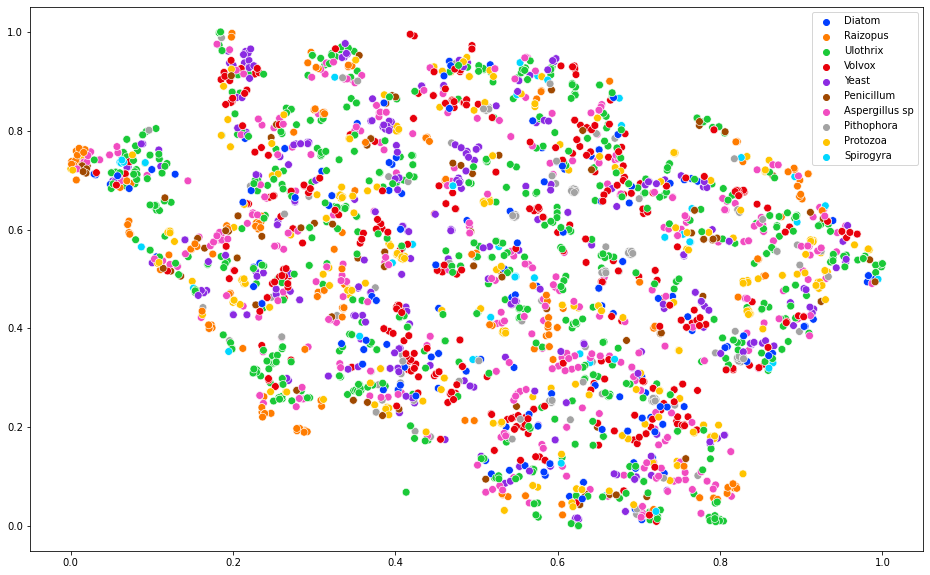

In [12]:
# визуализируем

x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne-x_min) / (x_max-x_min) # нормализовано

plt.figure(figsize=(16, 10))
ax = sns.scatterplot(x=X_norm[:, 0], y=X_norm[:, 1], hue=y, 
                     s=60, palette=sns.color_palette('bright'))
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, y_labels)

2 Визуализируйте точки из исходного признакового пространства в 2-мерном пространстве, используя метод главных компонент (sklearn.decomposition.PCA) или Truncated SVD (sklearn.decomposition.TruncatedSVD). Цвет точек пусть отражает метки классов (или номера кластеров из предыдущей работы).

In [13]:
# используем метод Truncated SVD
svd=decomposition.TruncatedSVD(n_components=2, algorithm='randomized', n_iter=5,  tol=0.0)
tr_svd=svd.fit_transform(df)

In [14]:
tr_svd.shape

(3053, 2)

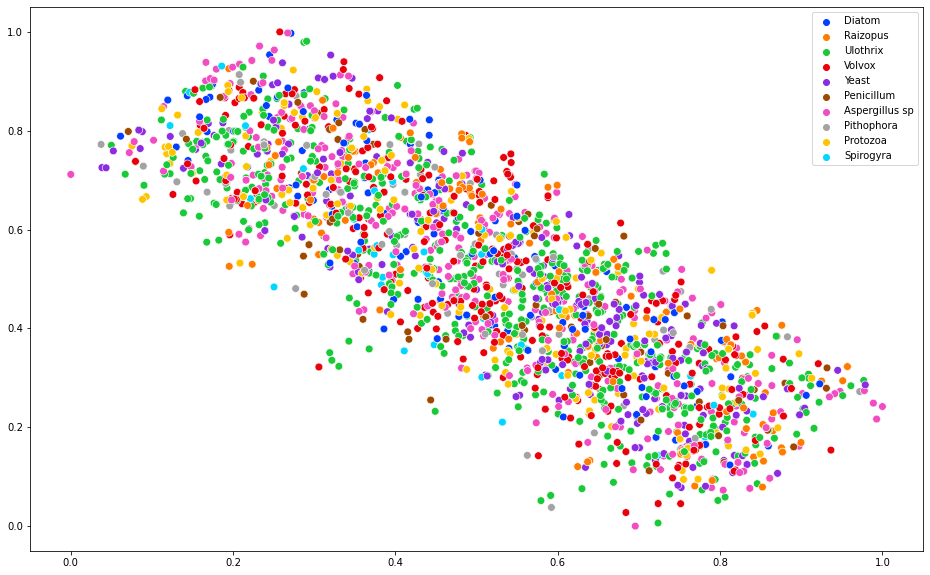

In [15]:
# визуализируем
x_min, x_max = tr_svd.min(0), tr_svd.max(0)
X_norm = (tr_svd-x_min) / (x_max-x_min) # нормализовано
plt.figure(figsize=(16, 10))
ax = sns.scatterplot(x=X_norm[:, 0], y=X_norm[:, 1], hue=y, 
                     s=60, palette=sns.color_palette('bright'))
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, y_labels)

3 На практике, как правило, выбирают столько главных компонент, чтобы оставить 90% дисперсии исходных данных. Чтобы оценить необходимое количество компонент, постройте график Number of components / Total explained variance. Пример построения есть в статье от ODS.

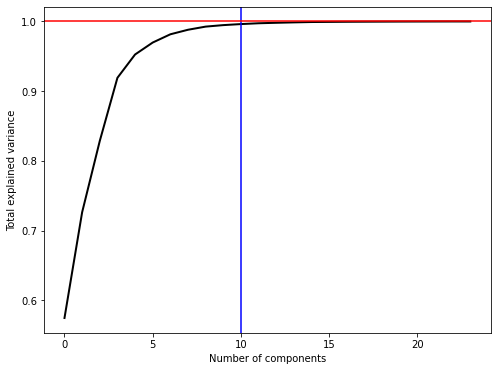

In [16]:
pca = decomposition.PCA().fit(df)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.axvline(10, c='b')
plt.axhline(0.99999, c='r')
plt.show()

4 Используя любой алгоритм классификации, исследуйте влияние понижения размерности признакового пространства на качество классификации. Обучите модель, используя все признаки,затем обучите модель после понижения признаковго пространства. Сравните метрики качества двух моделей. Сделайте выводы. Для выполнения данного задания набор данных можете взять новый.

PS: если исходные признаки были сильно коррелированы и вы правильно провели процедуру снижения размерности, оставив "правильное" число главных компонент, не потеряв существенной информации при этом, качество некоторых моделей может вырасти. Но в данной работе не требуется, чтобы непременно был выигрыш.

In [17]:
# разделяем на тестовые и тренировочные данные
Xtrain1, Xtest1, Ytrain1, Ytest1 = train_test_split(df, y, test_size=0.3, random_state=0)

# обучаем
model1 = RandomForestClassifier(criterion='entropy', n_estimators=20)
model1.fit(Xtrain1, Ytrain1)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [18]:
y_pred1 = model1.predict(Xtest1)
print("Accuracy:", accuracy_score(Ytest1, y_pred1))

Accuracy: 0.7445414847161572


In [19]:
# importances = model1.feature_importances_

In [20]:
# # Ищем наиболее важные (3)
# s = {col: imp for col, imp in zip(df2.columns, importances)}
# w = sorted(s, reverse=True, key=s.get)[:3]

In [21]:
pca = decomposition.PCA(n_components=10)
reduced_10 = pca.fit_transform(df)

In [22]:
# svd = decomposition.TruncatedSVD(n_components=6, algorithm='randomized', n_iter=5, tol=0.0)
# reduced_6 = svd.fit_transform(df)

In [23]:
# разделяем на тестовые и тренировочные данные
Xtrain2, Xtest2, Ytrain2, Ytest2 = train_test_split(reduced_10, y, test_size=0.3, random_state=0)

model2 = RandomForestClassifier(criterion='entropy', n_estimators=20)
model2.fit(Xtrain2, Ytrain2)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [24]:
y_pred2 = model2.predict(Xtest2)
print("Accuracy:", accuracy_score(Ytest2, y_pred2))

Accuracy: 0.7074235807860262


### Выводы

Видно, что при использовании меньшего количества компонент (10 вместо 20) accuracy при  использовании RandomForestClassifier уменьшается незначительно (с 0.708 до 0.679), что означает, что потерь ключевой для классификации информации почти не произошло.